# Desafio 6

Neste desafio, vamos praticar _feature engineering_, um dos processos mais importantes e trabalhosos de ML. Utilizaremos o _data set_ [Countries of the world](https://www.kaggle.com/fernandol/countries-of-the-world), que contém dados sobre os 227 países do mundo com informações sobre tamanho da população, área, imigração e setores de produção.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
from sklearn.datasets import load_digits, fetch_20newsgroups
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import (
    OneHotEncoder, Binarizer, KBinsDiscretizer,
    MinMaxScaler, StandardScaler, PolynomialFeatures
)
from sklearn.feature_extraction.text import (
    CountVectorizer, TfidfTransformer, TfidfVectorizer)

In [84]:
# Algumas configurações para o matplotlib.
#%matplotlib inline

#from IPython.core.pylabtools import figsize


#figsize(12, 8)

#sns.set()

In [96]:
countries = pd.read_csv("countries.csv")

In [97]:
new_column_names = [
    "Country", "Region", "Population", "Area", "Pop_density", "Coastline_ratio",
    "Net_migration", "Infant_mortality", "GDP", "Literacy", "Phones_per_1000",
    "Arable", "Crops", "Other", "Climate", "Birthrate", "Deathrate", "Agriculture",
    "Industry", "Service"
]

countries.columns = new_column_names

countries.head(15)

,Country,Region,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN
5,Angola,SUB-SAHARAN AFRICA,12127071,1246700,"9,7","0,13",0,"191,19",1900.0,"42,0","7,8","2,41","0,24","97,35",NaN,"45,11","24,2","0,096","0,658","0,246"
6,Anguilla,LATIN AMER. & CARIB,13477,102,"132,1","59,80","10,76","21,03",8600.0,"95,0","460,0",0,0,100,2,"14,17","5,34","0,04","0,18","0,78"
7,Antigua & Barbuda,LATIN AMER. & CARIB,69108,443,"156,0","34,54","-6,15","19,46",11000.0,"89,0","549,9","18,18","4,55","77,27",2,"16,93","5,37","0,038","0,22","0,743"
8,Argentina,LATIN AMER. & CARIB,39921833,2766890,"14,4","0,18","0,61","15,18",11200.0,"97,1","220,4","12,31","0,48","87,21",3,"16,73","7,55","0,095","0,358","0,547"
9,Armenia,C.W. OF IND. STATES,2976372,29800,"99,9","0,00","-6,47","23,28",3500.0,"98,6","195,7","17,55","2,3","80,15",4,"12,07","8,23","0,239","0,343","0,418"


## Observações

Esse _data set_ ainda precisa de alguns ajustes iniciais. Primeiro, note que as variáveis numéricas estão usando vírgula como separador decimal e estão codificadas como strings. Corrija isso antes de continuar: transforme essas variáveis em numéricas adequadamente.

Além disso, as variáveis `Country` e `Region` possuem espaços a mais no começo e no final da string. Você pode utilizar o método `str.strip()` para remover esses espaços.

In [98]:
numeric_columns_float = [
    'Pop_density', 
    'Coastline_ratio', 
    'Net_migration', 
    'Infant_mortality',
    'Literacy',
    'Phones_per_1000',
    'Arable',
    'Crops',
    'Other',
    'Climate',
    'Birthrate',
    'Deathrate',
    'Agriculture',
    'Industry',
    'Service'
]
strip_strings = ['Country', 'Region']
countries[numeric_columns_float] = countries[numeric_columns_float].replace(',', '.', regex=True)
countries[numeric_columns_float] = countries[numeric_columns_float].apply(pd.to_numeric)
countries[strip_strings] = countries[strip_strings].applymap(str.strip)

## Inicia sua análise a partir daqui

In [99]:
# Sua análise começa aqui.
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           227 non-null    object 
 1   Region            227 non-null    object 
 2   Population        227 non-null    int64  
 3   Area              227 non-null    int64  
 4   Pop_density       227 non-null    float64
 5   Coastline_ratio   227 non-null    float64
 6   Net_migration     224 non-null    float64
 7   Infant_mortality  224 non-null    float64
 8   GDP               226 non-null    float64
 9   Literacy          209 non-null    float64
 10  Phones_per_1000   223 non-null    float64
 11  Arable            225 non-null    float64
 12  Crops             225 non-null    float64
 13  Other             225 non-null    float64
 14  Climate           205 non-null    float64
 15  Birthrate         224 non-null    float64
 16  Deathrate         223 non-null    float64
 1

## Questão 1

Quais são as regiões (variável `Region`) presentes no _data set_? Retorne uma lista com as regiões únicas do _data set_ com os espaços à frente e atrás da string removidos (mas mantenha pontuação: ponto, hífen etc) e ordenadas em ordem alfabética.

In [35]:
def q1():
    # Retorne aqui o resultado da questão 1.
    return sorted(list(countries['Region'].unique()))

['ASIA (EX. NEAR EAST)',
 'BALTICS',
 'C.W. OF IND. STATES',
 'EASTERN EUROPE',
 'LATIN AMER. & CARIB',
 'NEAR EAST',
 'NORTHERN AFRICA',
 'NORTHERN AMERICA',
 'OCEANIA',
 'SUB-SAHARAN AFRICA',
 'WESTERN EUROPE']

## Questão 2

Discretizando a variável `Pop_density` em 10 intervalos com `KBinsDiscretizer`, seguindo o encode `ordinal` e estratégia `quantile`, quantos países se encontram acima do 90º percentil? Responda como um único escalar inteiro.

In [42]:
def q2():
    # Retorne aqui o resultado da questão 2.
    discretizer = KBinsDiscretizer(n_bins=10, encode="ordinal", strategy="quantile")
    score_bins = discretizer.fit_transform(countries[['Pop_density']])
    return int(sum(score_bins >= 9))

23

# Questão 3

Se codificarmos as variáveis `Region` e `Climate` usando _one-hot encoding_, quantos novos atributos seriam criados? Responda como um único escalar.

In [70]:
def q3():
    # Retorne aqui o resultado da questão 3.
    one_hot_encoder = OneHotEncoder(sparse=False, dtype=np.int)
    encoded_region = one_hot_encoder.fit_transform(countries[["Region"]])
    encoded_climate = one_hot_encoder.fit_transform(countries[["Climate"]].fillna(0))
    return encoded_region.shape[1] + encoded_climate.shape[1]

18

## Questão 4

Aplique o seguinte _pipeline_:

1. Preencha as variáveis do tipo `int64` e `float64` com suas respectivas medianas.
2. Padronize essas variáveis.

Após aplicado o _pipeline_ descrito acima aos dados (somente nas variáveis dos tipos especificados), aplique o mesmo _pipeline_ (ou `ColumnTransformer`) ao dado abaixo. Qual o valor da variável `Arable` após o _pipeline_? Responda como um único float arredondado para três casas decimais.

In [73]:
test_country = [
    'Test Country', 'NEAR EAST', -0.19032480757326514,
    -0.3232636124824411, -0.04421734470810142, -0.27528113360605316,
    0.13255850810281325, -0.8054845935643491, 1.0119784924248225,
    0.6189182532646624, 1.0074863283776458, 0.20239896852403538,
    -0.043678728558593366, -0.13929748680369286, 1.3163604645710438,
    -0.3699637766938669, -0.6149300604558857, -0.854369594993175,
    0.263445277972641, 0.5712416961268142
]

In [81]:
numeric_features_train = countries._get_numeric_data()
pipeline = Pipeline(steps=[('imputer', SimpleImputer(missing_values=np.nan, strategy="median")),('scaler', StandardScaler())])
pipeline.fit(numeric_features_train)
countries_test = pd.DataFrame([test_country], columns=countries.columns)
countries_test

,Country,Region,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Test Country,NEAR EAST,-0.190325,-0.323264,-0.044217,-0.275281,0.132559,-0.805485,1.011978,0.618918,1.007486,0.202399,-0.043679,-0.139297,1.31636,-0.369964,-0.61493,-0.85437,0.263445,0.571242


In [83]:
def q4():
    # Retorne aqui o resultado da questão 4.
    numeric_features_test = countries_test._get_numeric_data()
    model = pipeline.transform(numeric_features_test) #Apenas transform em dados de treino
    return float(round(model[0][9], 3))

-1.047

## Questão 5

Descubra o número de _outliers_ da variável `Net_migration` segundo o método do _boxplot_, ou seja, usando a lógica:

$$x \notin [Q1 - 1.5 \times \text{IQR}, Q3 + 1.5 \times \text{IQR}] \Rightarrow x \text{ é outlier}$$

que se encontram no grupo inferior e no grupo superior.

Você deveria remover da análise as observações consideradas _outliers_ segundo esse método? Responda como uma tupla de três elementos `(outliers_abaixo, outliers_acima, removeria?)` ((int, int, bool)).

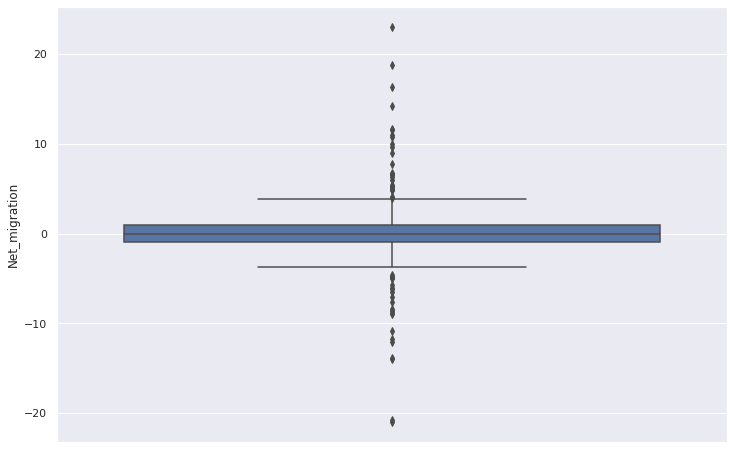

In [100]:
net_migration_outlier = countries.Net_migration.copy()
sns.boxplot(net_migration_outlier, orient='vertical')

In [106]:
quantile1 = net_migration_outlier.quantile(0.25)
quantile3 = net_migration_outlier.quantile(0.75)
iqr = quantile3 - quantile1

non_outlier_interval_iqr = [quantile1 - 1.5 * iqr, quantile3 + 1.5 * iqr]

print(f"Faixa considerada \"normal\": {non_outlier_interval_iqr}")

#outliers_iqr #false - A remoção traz prejuízo ao conjunto analisado

Faixa considerada "normal": [-3.8149999999999995, 3.885]


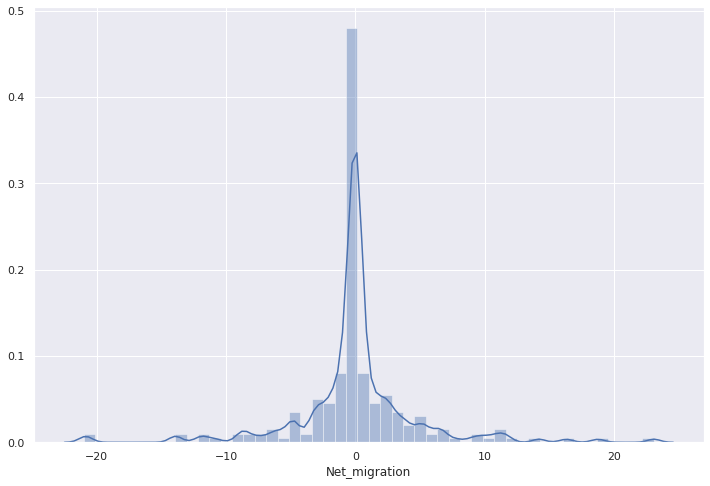

In [107]:
sns.distplot(net_migration_outlier.fillna(0));

In [109]:
outliers_iqr = net_migration_outlier[(net_migration_outlier < non_outlier_interval_iqr[0]) | (net_migration_outlier > non_outlier_interval_iqr[1])]
outliers_abaixo = net_migration_outlier[(net_migration_outlier < non_outlier_interval_iqr[0]) ]
print(outliers_abaixo)
outliers_acima = net_migration_outlier[(net_migration_outlier > non_outlier_interval_iqr[1]) ]

outliers_iqr #false - A remoção prejudica os dados

1      -4.93
3     -20.71
7      -6.15
9      -6.47
13     -4.90
30     -4.58
37    -12.07
56    -13.87
59     -8.58
75     -4.70
80     -8.37
81    -13.92
102    -4.92
130    -6.04
135    -4.87
136   -20.99
172    -7.11
174    -4.86
175    -7.64
176   -11.70
182    -5.69
193    -8.81
204   -10.83
220    -8.94
Name: Net_migration, dtype: float64
26


In [110]:
def q5():
    # Retorne aqui o resultado da questão 4.
    return (len(outliers_abaixo), len(outliers_acima), False)

(24, 26, False)

## Questão 6
Para as questões 6 e 7 utilize a biblioteca `fetch_20newsgroups` de datasets de test do `sklearn`

Considere carregar as seguintes categorias e o dataset `newsgroups`:

```
categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']
newsgroup = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)
```


Aplique `CountVectorizer` ao _data set_ `newsgroups` e descubra o número de vezes que a palavra _phone_ aparece no corpus. Responda como um único escalar.

In [151]:
categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']
newsgroup = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)

In [154]:
def q6():
    # Retorne aqui o resultado da questão 4.
    count_vectorizer = CountVectorizer()
    newsgroups_counts = count_vectorizer.fit_transform(newsgroup.data)
    
    result = (newsgroups_counts[:, count_vectorizer.vocabulary_['phone']].sum())
    
    return int(result)

213

## Questão 7

Aplique `TfidfVectorizer` ao _data set_ `newsgroups` e descubra o TF-IDF da palavra _phone_. Responda como um único escalar arredondado para três casas decimais.

In [153]:
def q7():
    # Retorne aqui o resultado da questão 4.
    vectorizer = TfidfVectorizer().fit(newsgroup.data)
    newsgroups_tfidf_vectorized = vectorizer.transform(newsgroup.data)
    
    tf_id = round(newsgroups_tfidf_vectorized[:, vectorizer.vocabulary_['phone']].sum(), 3)
    return float(tf_id)

8.888